/tmp/ipykernel_798205/3750491101.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path_doa, delim_whitespace=True, names=column_names, skiprows=1)


   usec_since_Unix_Start     Energy        El.       Az.   TDOA12   TDOA13  \
0       1727828920247057  100.22462  112.13162 -20.34177 -0.00072  0.00250   
1       1727828920276817  108.02992   97.44398  86.38306  0.00018 -0.00056   
2       1727828929175057  108.08092   94.23419  86.61661  0.00018 -0.00045   
3       1727828929740497  108.67086   94.28181  86.86790  0.00018 -0.00045   
4       1727828930246417  123.89498   94.26151  86.44693  0.00018 -0.00045   

    TDOA14   TDOA23   TDOA24   TDOA34    Xcorr12    Xcorr13    Xcorr14  \
0 -0.00328  0.00262 -0.00007  0.00502  107.59913   99.03860  117.38615   
1  0.00010 -0.00063 -0.00008  0.00054  244.23279  152.87755  140.58717   
2  0.00010 -0.00063 -0.00008  0.00055  168.07860  199.79164  213.69382   
3  0.00010 -0.00063 -0.00008  0.00054  259.81421  245.74075  285.59445   
4  0.00010 -0.00062 -0.00008  0.00055  289.48206  320.95490  293.15317   

     Xcorr23    Xcorr24    Xcorr34  
0  117.54787  142.81660   94.77840  
1  132.78342

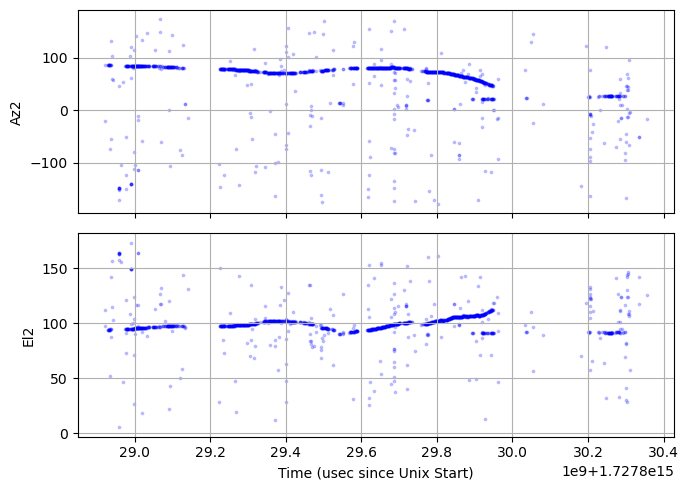

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the column names
column_names = ["usec_since_Unix_Start", "Energy", "El.", "Az.", "TDOA12", "TDOA13", "TDOA14", 
                "TDOA23", "TDOA24", "TDOA34", "Xcorr12", "Xcorr13", "Xcorr14", 
                "Xcorr23", "Xcorr24", "Xcorr34"]

# Load the data with the specified column names
path_doa = "../../C/deployment_files/2024-10-1-17-28-35-306897_detection"
df = pd.read_csv(path_doa, delim_whitespace=True, names=column_names, skiprows=1)

# Display the first few rows to verify
print(df.head())

# Create a figure with two subplots (one for Azimuth vs. Time, one for Elevation vs. Time)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

# Plot Azimuth vs. Time with transparency on the first subplot
azData = df["Az."]
ax1.scatter(df["usec_since_Unix_Start"], azData, marker='o', s=3, color='b', alpha=0.2)
ax1.set_ylabel("Az2")
ax1.grid(True)

# Plot Elevation vs. Time with transparency on the second subplot
elData = df["El."]
ax2.scatter(df["usec_since_Unix_Start"], elData, marker='o', s=3, color='b', alpha=0.2)
ax2.set_xlabel("Time (usec since Unix Start)")
ax2.set_ylabel("El2")
ax2.grid(True)

# Adjust the layout to ensure no overlapping and display the plot
plt.tight_layout()

# Extract the base path from the file path and create the output file path
base_path = os.path.splitext(path_doa.split('/')[-1])[0]  # Remove file extension
output_path = base_path + "_raw.png"  # Append desired file name extension
    
# Save the figure to the output path
plt.savefig(output_path, dpi=300)
print(f"Plot saved to {output_path}")
plt.show()
